# Clase 14 - Reconocimiento de Patrones en Imagenes

In [ ]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from itertools import combinations

# definimos un color para cada imagen del dataset en forma manual

dcc={'textura_1.tif':[1,0,0],
    'textura_2.tif':[1,0,0],
    'textura_3.tif':[0,1,0],
    'textura_4.tif':[0,1,0],
    'textura_5.tif':[0,1,0],
    'textura_6.tif':[0,1,0],
    'textura_7.tif':[1,0,0],
    'textura_8.tif':[1,0,0],
    'textura_9.tif':[1,0,0],
    'textura_10.tif':[0,1,0],
    'textura_11.tif':[0,0,1],
    'textura_12.tif':[0,0,1],
    'textura_13.tif':[0,0,1],
    'textura_14.tif':[0,0,1],
    'textura_15.tif':[0,0,1] }

clase = [1,1,2,2,2,2,1,1,1,2,3,3,3,3,3]

recorte = lambda texto:texto.split('/')[-1]

In [2]:
#funcion que extrae las caracteristicas
def extraccion_textura(imagen, features):
    '''
    funcion que utiliza extrae de una imagen un conjunto
    de caracteristicas definidas para la matriz de co-ocurrencia
    '''

    gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

    columna =  gray.reshape(-1,1)

    # parte del codigo donde modificamos
    # los niveles de intensidad
    nueva_escala =  (0,10)
    niveles = max(nueva_escala)+1

    resultado = MinMaxScaler(nueva_escala).fit_transform(columna).astype(int)
    resultado = resultado.reshape(gray.shape)


    #calculamos la matriz de co-ocurrencia
    comat =graycomatrix(resultado, angles=[np.radians(0)],distances=[2], levels=niveles)

    S = []
        # para cada imagen extraemos las caracteristicas definidas en la lista features
    for ft in features:
        sts = graycoprops(comat, ft).squeeze()
        S.append(float(sts))

    return S

In [3]:
images = imread_collection('../IMG/texturas_fisher/textura_*.tif')

#lista con nombres
nombres = images.files
nombres = list(map(recorte, nombres))

features = ['contrast','dissimilarity','homogeneity', 'ASM', 'energy','correlation','entropy']

#creamos una lista con grupos de dos caracteristicas
lista_feat = list(combinations(features, 2))

# para cada imagen, extraemos las caracteristicas
# definidas en features
V = []
for textura in images:
    V.append(extraccion_textura(textura, features))

df = pd.DataFrame(V, columns=features, index=nombres)

df['class'] = clase


print(df)


                contrast  dissimilarity  homogeneity       ASM    energy  \
textura_1.tif   2.394725       1.200156     0.515768  0.053207  0.230666   
textura_2.tif   2.359738       1.193508     0.517130  0.040087  0.200217   
textura_3.tif   5.419643       1.620617     0.490966  0.057870  0.240563   
textura_4.tif   2.183084       1.025968     0.592799  0.053480  0.231257   
textura_5.tif   2.494819       1.073034     0.590581  0.060620  0.246211   
textura_6.tif   1.853152       0.915449     0.628832  0.079506  0.281967   
textura_7.tif   2.472722       1.228464     0.506660  0.040990  0.202460   
textura_8.tif   2.610237       1.261985     0.499089  0.039175  0.197926   
textura_9.tif   2.564014       1.255462     0.499438  0.043623  0.208861   
textura_10.tif  4.912952       1.515002     0.519119  0.076695  0.276939   
textura_11.tif  3.965263       1.543205     0.448903  0.042090  0.205157   
textura_12.tif  4.087843       1.546667     0.453348  0.040687  0.201711   
textura_13.t

## Indice de Fisher

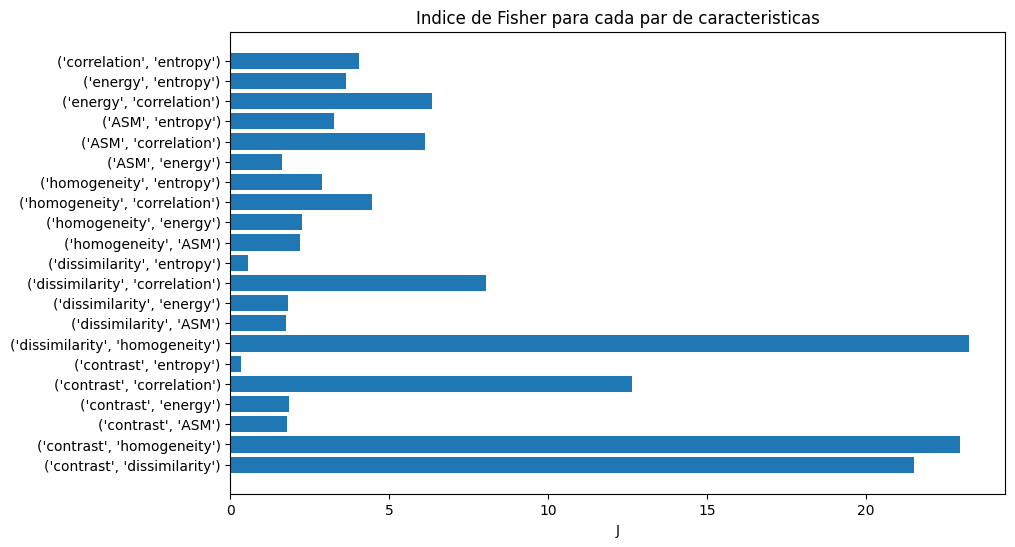

In [ ]:
J = []

#Calcular J para todas las combinaciones de dos caracteristicas
for feat in lista_feat:

    #extraemos las dos caracteristicas y la clase
    D = df[[feat[0], feat[1],'class']].values

    #centro de masa de todos los puntos
    v =  np.mean(D[:,:2],axis=0).reshape(-1,1)

    clusters = np.arange(1,4)  #retorna [1 2 3]

    p = np.ones(3)/3

    Cb = np.zeros((2,2))
    Cw = np.zeros((2,2))

    for k, id_cluster in enumerate(clusters):
        idx = D[:,2]==id_cluster
        sub_data = D[idx,:2]

        v_k = np.mean(sub_data, axis=0).reshape(-1,1)
        Cb =  Cb + p[k]*(v_k-v)@(v_k-v).T
        Cw = Cw + p[k]* np.cov(sub_data.T)

    j =  np.trace(np.linalg.inv(Cw)@Cb)

    J.append(j)


#Graficamos J
plt.figure(figsize=(10,6))
plt.barh(range(len(lista_feat)), J)
plt.yticks(range(len(lista_feat)), lista_feat)
plt.xlabel('J')
plt.title('Indice de Fisher para cada par de caracteristicas')
plt.show()

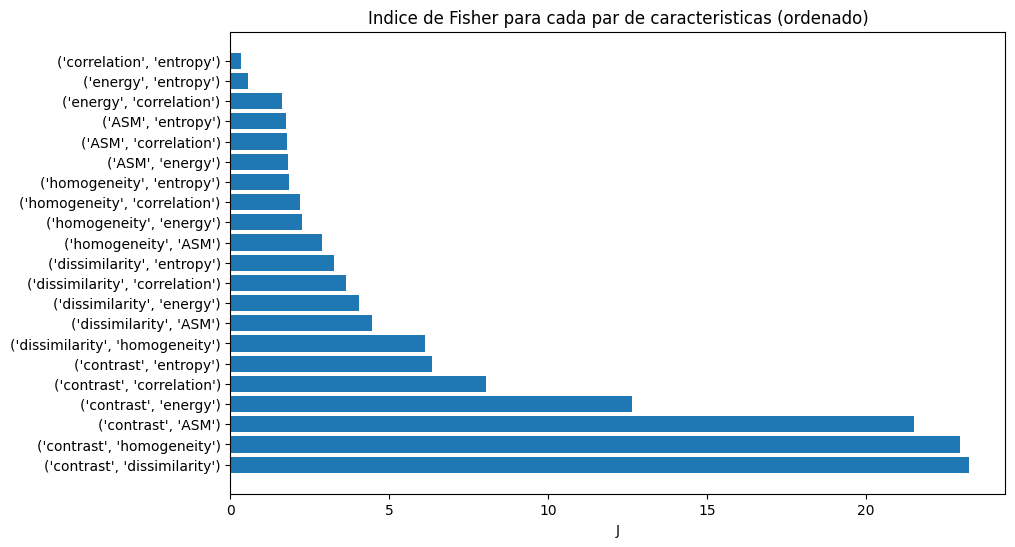

In [5]:
#Mostrar Barras ordenadas
J_sorted = sorted(J, reverse=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(J_sorted)), J_sorted)
plt.yticks(range(len(J_sorted)), lista_feat, rotation=0)
plt.xlabel('J')
plt.title('Indice de Fisher para cada par de caracteristicas (ordenado)')
plt.show()

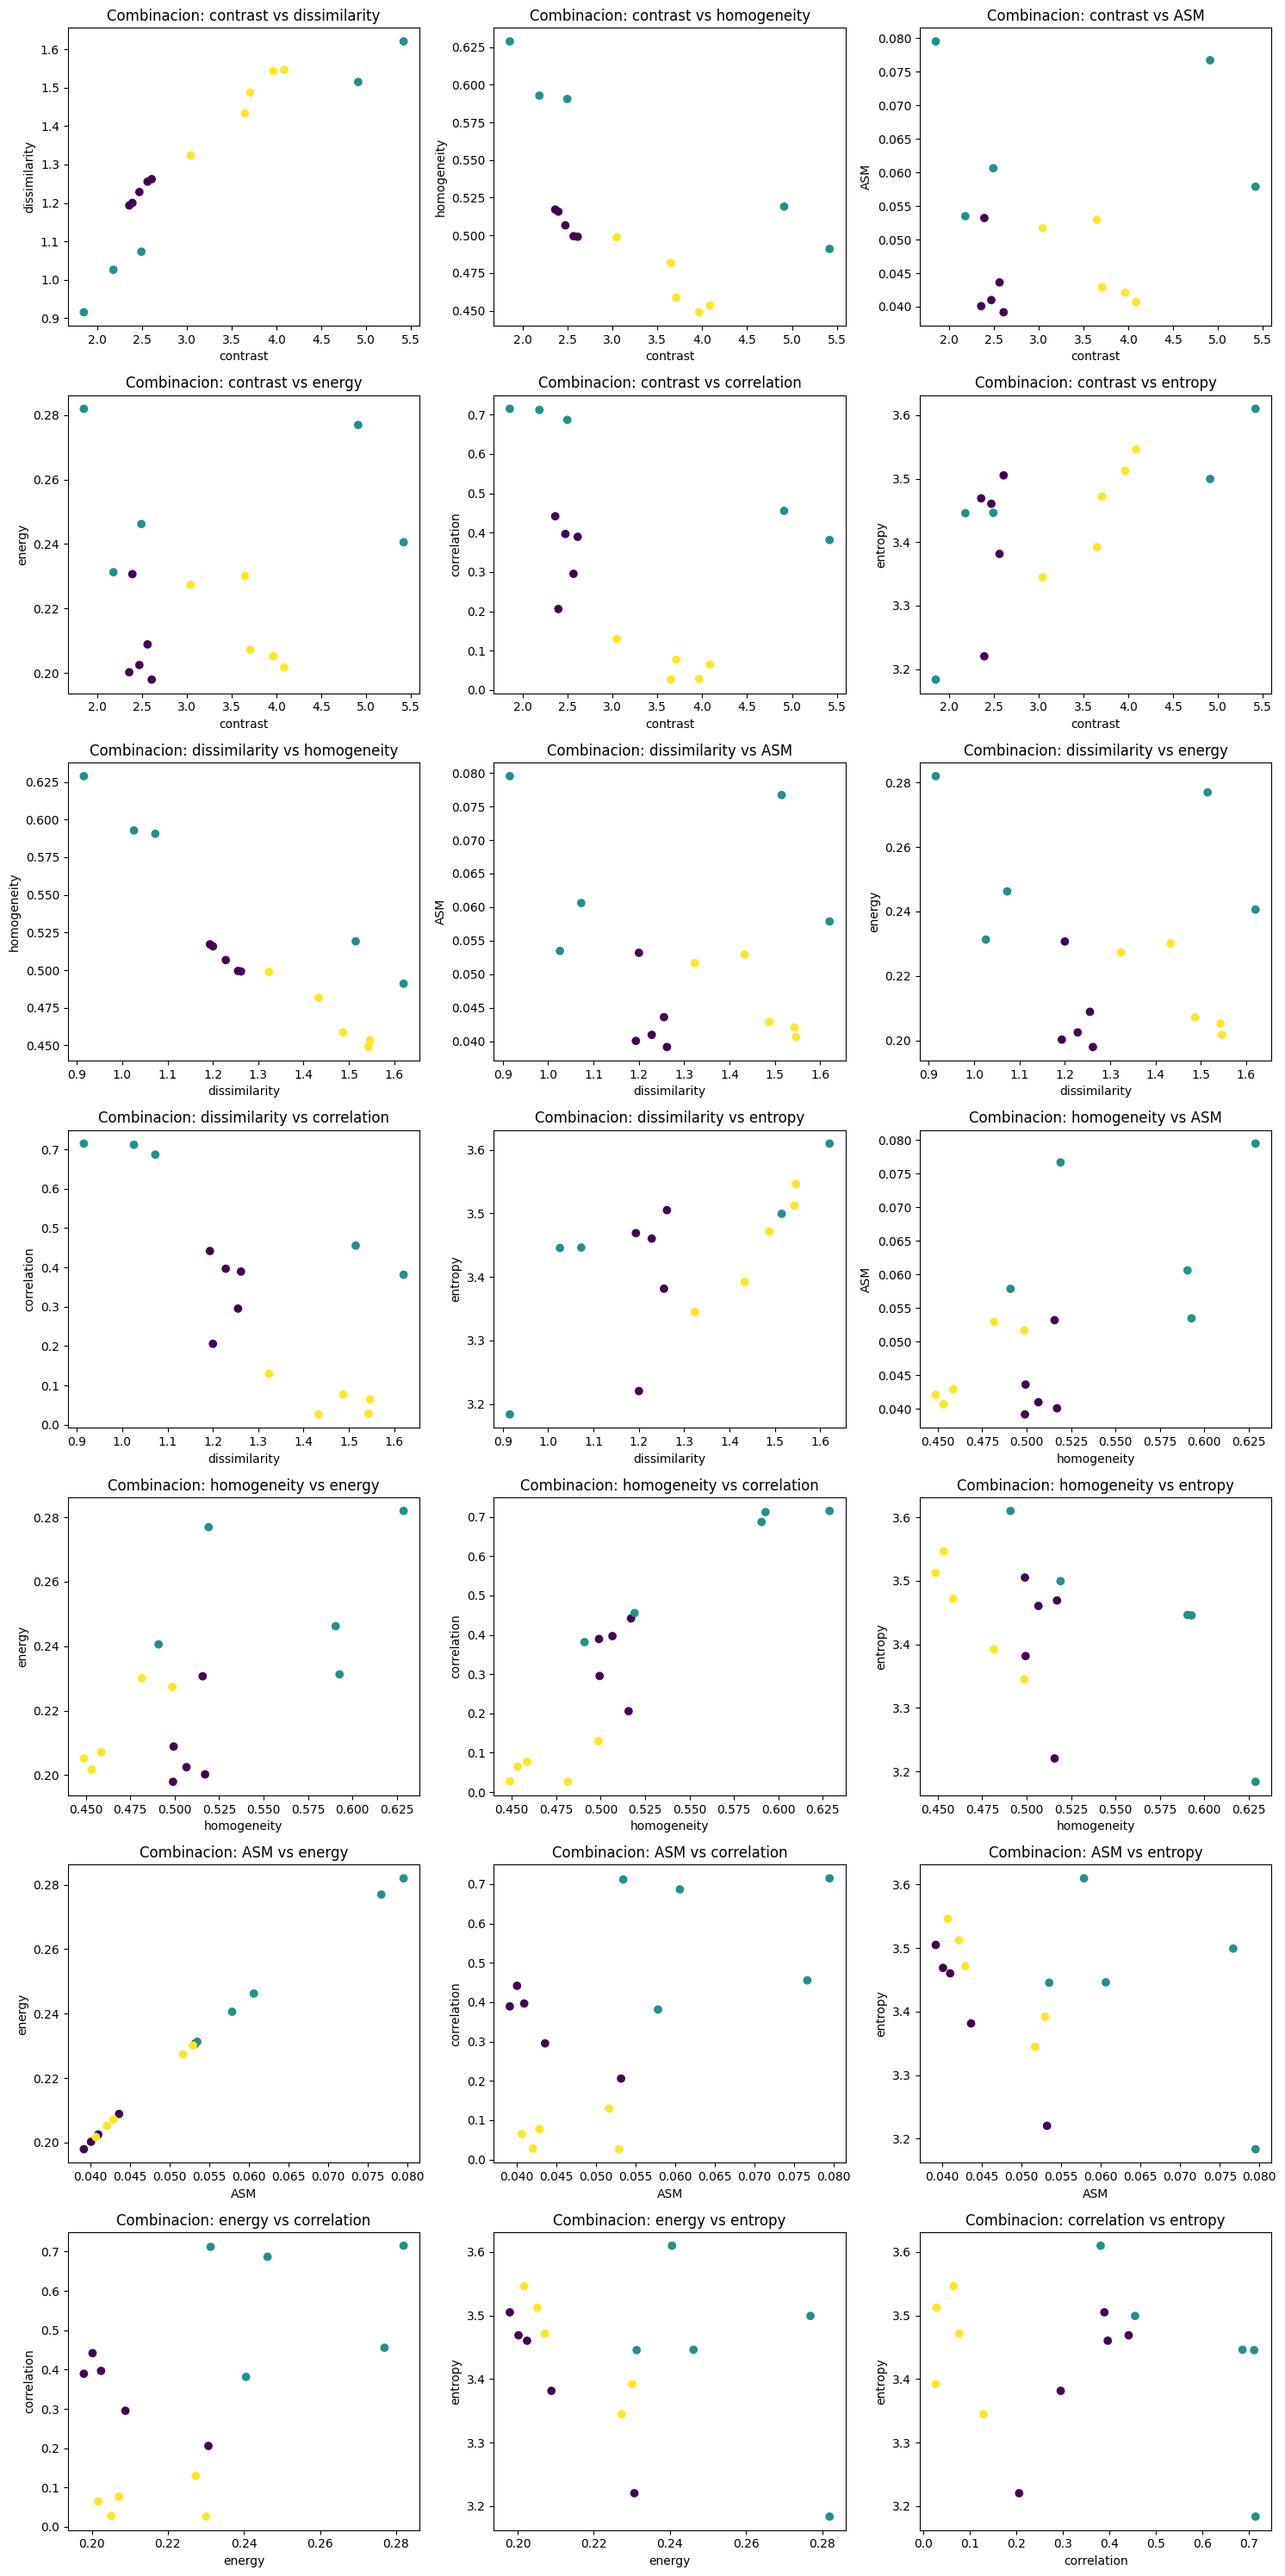

In [6]:
#mostrar todas las combinaciones de caracteristicas
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,30))
axes = axes.ravel()

for i, feat in enumerate(lista_feat):
    axes[i].scatter(df[feat[0]], df[feat[1]], c=df['class'], cmap='viridis')
    axes[i].set_xlabel(feat[0])
    axes[i].set_ylabel(feat[1])
    axes[i].set_title(f'Combinacion: {feat[0]} vs {feat[1]}')

plt.tight_layout()
plt.show()